<a href="https://colab.research.google.com/github/SerbC/Taid2024/blob/main/Laborator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Pasi:
#DONE   1) Incarcam imaginile
#       a) Suffle the images
#       b) impartim imaginile in train si test
#DONE   2) Preprocesare
#          a) standardizam imaginile (dimensiune, rotatie, etc)
#          b) redimensionam imaginile
#          c) Spatiul de culori standardizat
#   3) Augumentarea bazei de date (Nu facem in lab dar putem discuta metode)
#   4) Extragere de trasaturi
#   5) Clasificator
#   6) Testare (PR, Confusion Matrix, etc)

In [1]:
import sklearn as sk
import cv2
import numpy as np
import glob
import random
import matplotlib.pyplot as plt

In [6]:
base_path = '/content/drive/MyDrive/fac/Laborator/Images/' # fiecare schimba cu path in drive
file_path_arr = []
for i in range(4):
  file_path_arr.append(glob.glob(base_path+str(i)+'/*.jpg'))
print(file_path_arr)

[['/content/drive/MyDrive/fac/Laborator/Images/0/0.jpg', '/content/drive/MyDrive/fac/Laborator/Images/0/1.jpg', '/content/drive/MyDrive/fac/Laborator/Images/0/2.jpg', '/content/drive/MyDrive/fac/Laborator/Images/0/3.jpg', '/content/drive/MyDrive/fac/Laborator/Images/0/4.jpg', '/content/drive/MyDrive/fac/Laborator/Images/0/5.jpg', '/content/drive/MyDrive/fac/Laborator/Images/0/6.jpg', '/content/drive/MyDrive/fac/Laborator/Images/0/7.jpg', '/content/drive/MyDrive/fac/Laborator/Images/0/8.jpg', '/content/drive/MyDrive/fac/Laborator/Images/0/9.jpg'], ['/content/drive/MyDrive/fac/Laborator/Images/1/0.jpg', '/content/drive/MyDrive/fac/Laborator/Images/1/1.jpg', '/content/drive/MyDrive/fac/Laborator/Images/1/2.jpg', '/content/drive/MyDrive/fac/Laborator/Images/1/3.jpg', '/content/drive/MyDrive/fac/Laborator/Images/1/4.jpg', '/content/drive/MyDrive/fac/Laborator/Images/1/5.jpg', '/content/drive/MyDrive/fac/Laborator/Images/1/6.jpg', '/content/drive/MyDrive/fac/Laborator/Images/1/7.jpg', '/cont

In [16]:
random.seed(42)
image_index_arr = random.sample(range(0,9), 7)
print(image_index_arr)

[1, 0, 5, 2, 8, 4, 7]


In [17]:
train_image_paths = []
test_image_path = []
for pths in file_path_arr:
  tmp_train = []
  tmp_test = []
  for i in range(10):
    if i in image_index_arr:
      tmp_train.append(pths[i])
    else:
      tmp_test.append(pths[i])
  train_image_paths.append(tmp_train)
  test_image_path.append(tmp_test)

print(test_image_path)
print(np.shape(train_image_paths))
print(np.shape(test_image_path))

[['/content/drive/MyDrive/fac/Laborator/Images/0/3.jpg', '/content/drive/MyDrive/fac/Laborator/Images/0/6.jpg', '/content/drive/MyDrive/fac/Laborator/Images/0/9.jpg'], ['/content/drive/MyDrive/fac/Laborator/Images/1/3.jpg', '/content/drive/MyDrive/fac/Laborator/Images/1/6.jpg', '/content/drive/MyDrive/fac/Laborator/Images/1/9.jpg'], ['/content/drive/MyDrive/fac/Laborator/Images/2/3.jpg', '/content/drive/MyDrive/fac/Laborator/Images/2/6.jpg', '/content/drive/MyDrive/fac/Laborator/Images/2/9.jpg'], ['/content/drive/MyDrive/fac/Laborator/Images/3/3.jpg', '/content/drive/MyDrive/fac/Laborator/Images/3/6.jpg', '/content/drive/MyDrive/fac/Laborator/Images/3/9.jpg']]
(4, 7)
(4, 3)


In [18]:
train_images = []
test_images = []

for cls in train_image_paths:
  t = []
  for element in cls:
    t.append(cv2.imread(element))
  train_images.append(t)

for cls in test_image_path:
  t = []
  for element in cls:
    t.append(cv2.imread(element))
  test_images.append(t)

print(np.shape(train_images))
# nr clase, exemple per calsa, height, width, chanels

(4, 7, 4032, 1908, 3)


(<Figure size 640x480 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7f8ebad50e50>)

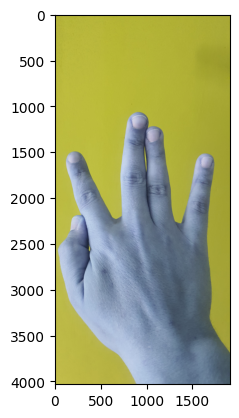

In [20]:
plt.figure(), plt.imshow(train_images[0][0])

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7f8ebad612d0>)

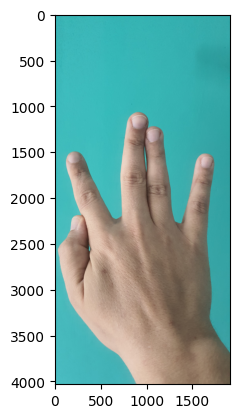

In [21]:
im = train_images[0][0]
img_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.figure(), plt.imshow(img_rgb)

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7f8ebaf105b0>)

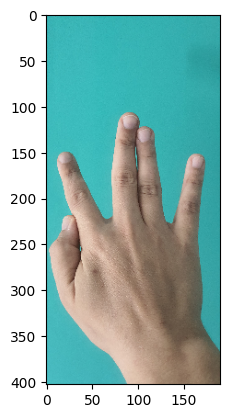

In [29]:
w ,h,_ = np.shape(img_rgb)
scale_dw = 10
im_resized = cv2.resize(img_rgb, ( int(h/scale_dw), int(w/scale_dw)))
plt.figure(), plt.imshow(im_resized)